# **Import libraries**

In [14]:
# ===== Packages =====
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bootstrap

from tqdm import tqdm
from prettytable import PrettyTable

# ===== User Defined Packages =====
import titanic_helpers as th

%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 12

sns.set_theme(style="darkgrid")


# **EDA - Exploratory Data Analysis**
## In this section:
* Loading the data and sneak peeking it
* Check what data types exist in the dataset
* Get some statistics estimators from the data
* Check for missing values
* Plot some distributions
* Check for correlation between the features and also between the features and the target

In [2]:
df = pd.read_csv('Data/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## We can see there are 891 records and 12 field: 11 predictors and 1 target (Survived)
## For convience we'll move the Survived field to the right hand of the table:

In [3]:
col_list = list(df.columns)
col_list[1], col_list[-1] = col_list[-1], col_list[1]
df = df.reindex(columns=col_list)

In [4]:
df.head()

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived
0,1,S,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,S,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1
4,5,S,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0


## Some overview on the different features (just the not obvious ones):
* Embarked - Port of Embarktion (C = Cherbourg, Q = Queenstown, S = Southampton)
* Pclass - Ticket Class (1st classs, 2nd class...)
* SobSp - Number of siblings / spouses aboard the Titanic
* Parch - Number of parents / children aboard the Titanic
* Ticket - Ticket number
* Fare - The price of the ticket
* Cabin - Cabin number


## Get some info about the data:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Embarked     889 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Use value counts on each feature to understand it more:

In [6]:
th.value_counts_all(df)

----------------------------------------PassengerId---------------------------------------- - 

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

----------------------------------------Embarked---------------------------------------- - 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

----------------------------------------Pclass---------------------------------------- - 

3    491
1    216
2    184
Name: Pclass, dtype: int64

----------------------------------------Name---------------------------------------- - 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnso

## Some inresting insights from value_counts (and also from df.info()):
* PassengerID gives us no information probably will be dropped.
* Embarked and Pclass are categorial variables with cardinality of 3.
* Name as it is gives us no useful information but it might be interesting to use the status (Miss, Mr) of the passengers as a new feature.
* Sex is a categorial variable with cardinality of 2.
* Age is a continuous variable with 177 null values out of 891 records.
* SibSp and Parch are categorial variables with cardinality of 7.
* For now it seems Ticket gives us no useful information (needs to be checked more thoroughly).
* Fare is a continuous variable.
* Cabin has 684 missing values and also has many different bins (and I'm sure that there are many more unkowns bins to us), so might be dropped.
* Survived is a categorial variable with cardinality of 2.



## **Plot features and target distributions:**

### Plot Pr(Surveived) and countplot of survived

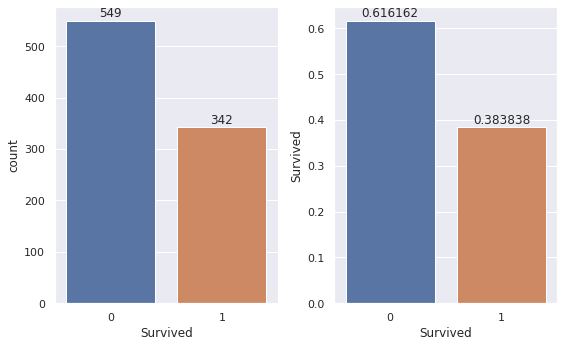

In [7]:
#titanic = sns.load_dataset("titanic")
fig = plt.figure(figsize=(8.,5.))
ax = fig.add_subplot(1,2,1)
ax = sns.countplot(x="Survived", data=df)
ax.bar_label(ax.containers[0], padding=1)

ax = fig.add_subplot(1,2,2)
ax = sns.barplot(x="Survived", y='Survived',data=df, estimator=lambda x: len(x) / len(df))
ax.bar_label(ax.containers[0], padding=1)

fig.tight_layout()

### We can see that the data is pretty balanced

### **Plot the categorial features: (Embarked, Pclass, Sex, SibSp, Parch)**
* Pr(feature) for detecting rare labels and biased features
* Barplot for the ditribution Pr(Survived|Feature)

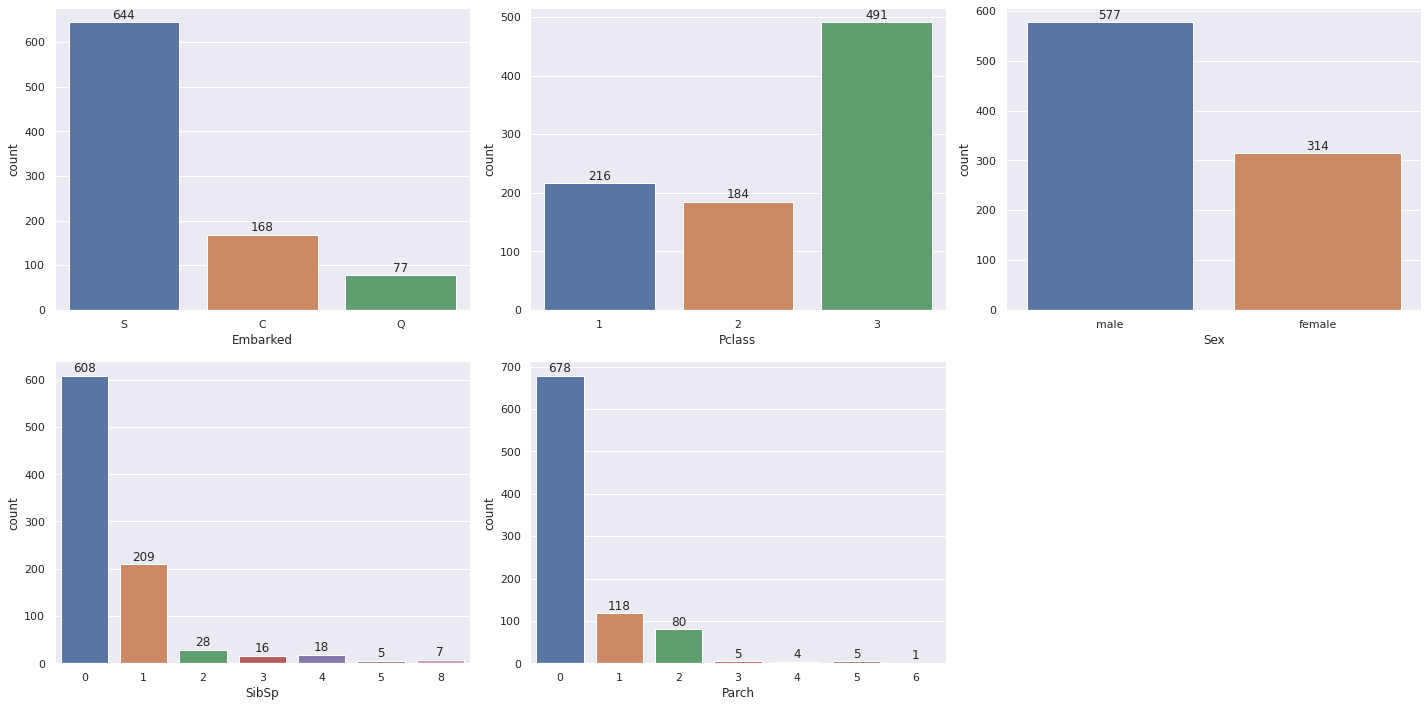

In [8]:
cols_to_plot = ['Embarked', 'Pclass', 'Sex', 'SibSp', 'Parch']
fig = plt.figure(figsize=(20.,10.))
for i, col in enumerate(cols_to_plot):
    ax = fig.add_subplot(2,3,i+1)
    ax = sns.countplot(x=col,data=df)
    ax.bar_label(ax.containers[0], padding=1)
    
    
fig.tight_layout()

## Pr(survived|feature):

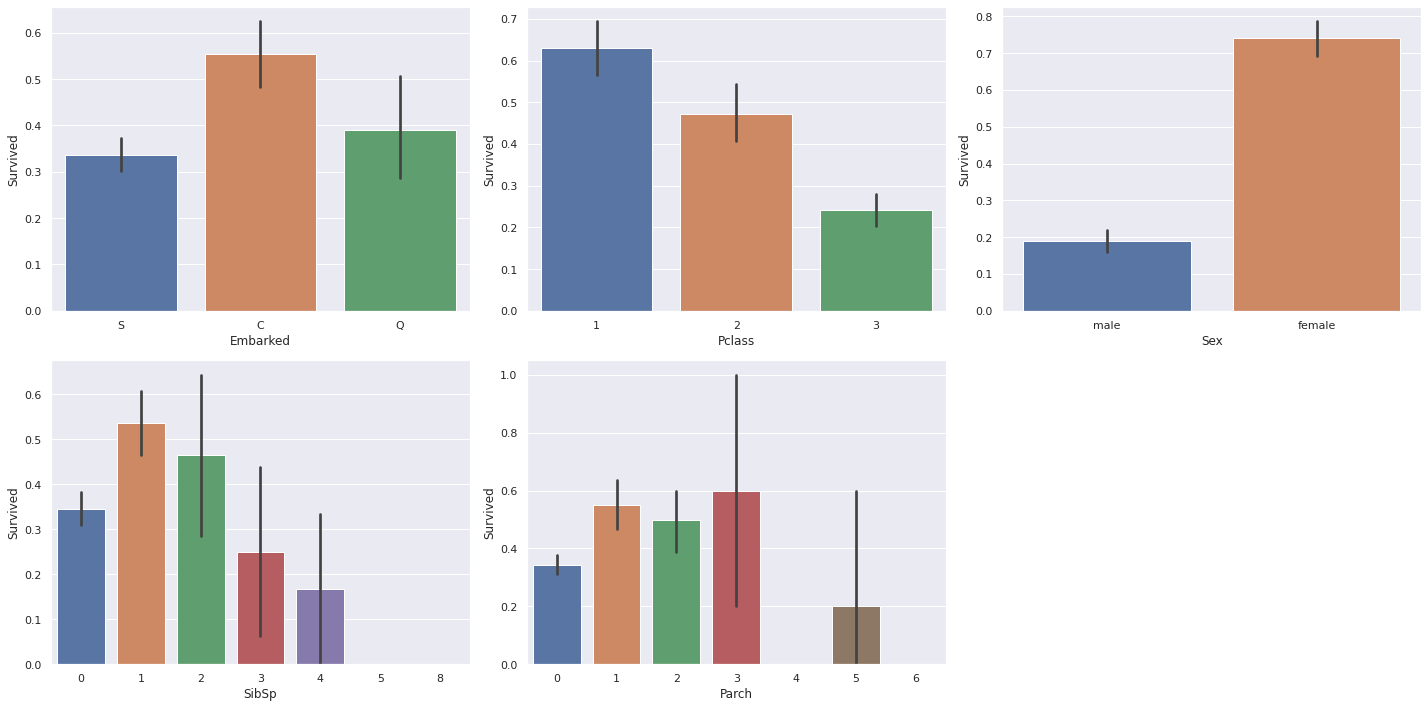

In [9]:
cols_to_plot = ['Embarked', 'Pclass', 'Sex', 'SibSp', 'Parch']
fig = plt.figure(figsize=(20.,10.))
for i, col in enumerate(cols_to_plot):
    ax = fig.add_subplot(2,3,i+1)
    ax = sns.barplot(x=col, y='Survived',data=df)
    
    
fig.tight_layout()


## Some interesting insights:
* people who embarked from Cherbourg are more likely to survive then people who embarked from Queenstown and Southampton
* the higher the pclass the higher the survival rate
* female survival rate was higher than male (I guess the men let the women to escape first) 
* about Sibsp and Parch: it seems that if you didnt have family at all in the boat or had too many family members then you are likely to not survive. (no family = no help, too many family members = too many people to help to)

## From the distributions it seems that all those features are very informative and that they should contribute to the classification

## **Plot the continues variables distributions:**
* NOTE: the age column is preimputed. after imputation we will plot the distribution again and compare to this one to make sure we did not change the distribution.

+---------+-------+--------------------------------------------------------------------+--------+-----------------------------------------------+
| Feature |  Mean |                           Mean CI (95%)                            | Median |                Median CI (95%)                |
+---------+-------+--------------------------------------------------------------------+--------+-----------------------------------------------+
|   Age   | 29.70 | ConfidenceInterval(low=28.61994327731092, high=30.77595168067226)  | 28.00  |    ConfidenceInterval(low=27.0, high=29.0)    |
|   Fare  | 32.20 | ConfidenceInterval(low=28.781156122334465, high=35.37970073512906) | 14.45  | ConfidenceInterval(low=13.3584, high=15.9084) |
+---------+-------+--------------------------------------------------------------------+--------+-----------------------------------------------+


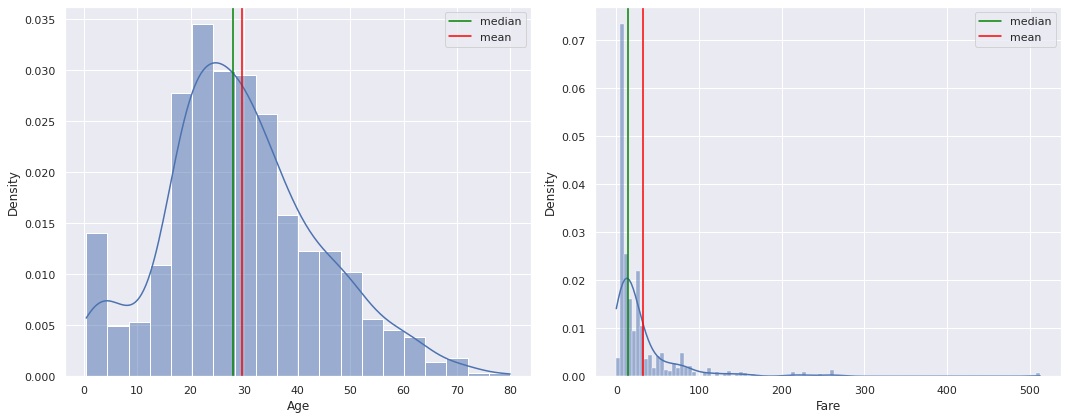

In [12]:
# Plot the age distribution
fig,ax = plt.subplots(1,2,figsize=(15, 6))
sns.histplot(data=df, x='Age', kde=True, stat='density', ax=ax[0])
age_mean = df['Age'].mean()
age_median = df['Age'].median()
ax[0].axvline(x=age_median, color='green', label='median')
ax[0].axvline(x=age_mean, color='red', label='mean')
ax[0].legend()

sns.histplot(data=df, x='Fare', kde=True, stat='density', ax=ax[1])
fare_mean = df['Fare'].mean()
fare_median = df['Fare'].median()
ax[1].axvline(x=fare_median, color='green', label='median')
ax[1].axvline(x=fare_mean, color='red', label='mean')
ax[1].legend()

fig.tight_layout()

# Print the mean, median, and CIs (using bootstrap) of each feature:
age_data = df[~df['Age'].isnull()]['Age'].values
fare_data = df['Fare'].values

ci_mean_age = bootstrap((age_data,), np.mean, confidence_level=0.95, method='basic')
ci_median_age = bootstrap((age_data,), np.median, confidence_level=0.95, method='basic')

ci_mean_fare = bootstrap((fare_data,), np.mean, confidence_level=0.95, method='basic')
ci_median_fare = bootstrap((fare_data,), np.median, confidence_level=0.95, method='basic')

statistics_table = PrettyTable(float_format='.2', field_names = ['Feature', 'Mean', 'Mean CI (95%)', 'Median', 'Median CI (95%)'])
statistics_table.add_row(['Age', age_mean, ci_mean_age.confidence_interval,age_median, ci_median_age.confidence_interval])
statistics_table.add_row(['Fare', fare_mean, ci_mean_fare.confidence_interval,fare_median, ci_median_fare.confidence_interval])
print(statistics_table)

## insights:
## Age:
* most of the passengers are around the age of 30
* the distribution seems to be unskewed (the median and mean are almost the same)

## Fare:
* the fare distribution semmes to be right skewed, we will have to deal with it later so it wont harm our models performance (especially the linear models)

## Plot Pr(Survived|Age) and Pr(not Survived|Age):

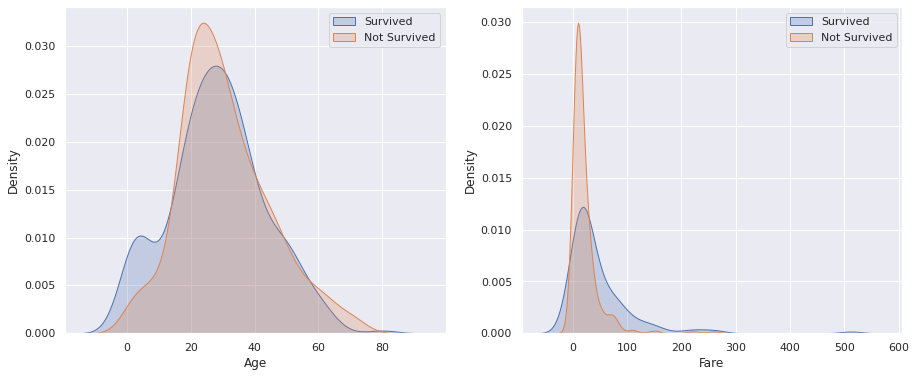

In [15]:
survived = df[df['Survived']==1]
not_survived = df[df['Survived']==0]

fig,ax = plt.subplots(1,2,figsize=(15, 6))
sns.kdeplot(data=survived, x='Age', fill=True,ax=ax[0], label='Survived')
sns.kdeplot(data=not_survived, x='Age', fill=True,ax=ax[0], label='Not Survived')
ax[0].legend()

sns.kdeplot(data=survived, x='Fare', fill=True, ax=ax[1], label='Survived')
sns.kdeplot(data=not_survived, x='Fare', fill=True, ax=ax[1], label='Not Survived')
ax[1].legend()


## Insights:
## Age:
* the young people (about 16 - 30) were less likely to survive, probably they let the children and the elderly escape first.
* also the old people (about 60 - 80) were less likely to survive

## Fare:
* the passengers who paid more were more likely to survive. 
It's correlated with that the people from the 1st class are more likely to survive. (maybe the fare feature does not give us mote information, we will check this when we will check the correlation between the different features)

## **Correlation between features (also between features and target):** high correlated features are no good for linear models since the models will not be able to infer the feature importance. for example, if we have the model: Y = w1 * X1 + w2 * X2 and X1 and X2 are correlated then increase in X1 will cause an increase in X2, so we would no be able to see each feature's influence on Y.

In [38]:
corr_df['Sex'].value_counts()

1    891
Name: Sex, dtype: int64

<AxesSubplot:>

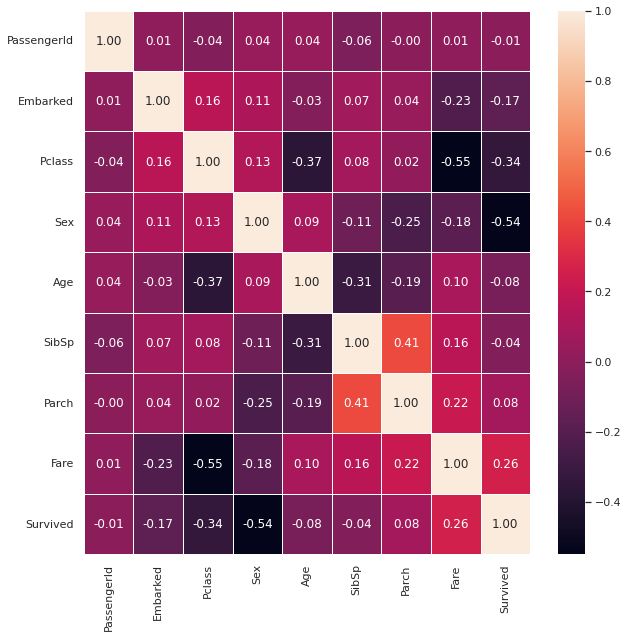

In [42]:
# First we will label the sex and embarked categories (pd.corr ignores not numeric categorial variables)
corr_df = df.copy(deep=True)
corr_df['Sex'] = corr_df['Sex'].map({'male':1, 'female':0})
corr_df['Embarked'] = corr_df['Embarked'].map({'C':0, 'Q':1, 'S':2})



fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.heatmap(corr_df.corr(), annot=True, linewidths=0.5, fmt='.2f', ax=ax)


## Sort features according to correlation: (take top 10)

In [43]:
corr = corr_df.corr()
# Take only the down traingle without the diagonal (correlation mactrix is symetric) 
# and take absolute value (we dont care about the direction of the correlation, only magnitude)
corr.loc[:,:] = np.abs(np.tril(corr.values, k=-1)) 
corr.unstack().sort_values(ascending=False)[:10]

Pclass    Fare        0.549500
Sex       Survived    0.543351
SibSp     Parch       0.414838
Pclass    Age         0.369226
          Survived    0.338481
Age       SibSp       0.308247
Fare      Survived    0.257307
Sex       Parch       0.245489
Embarked  Fare        0.226311
Parch     Fare        0.216225
dtype: float64

## insights:
* there is no multicolinearity problem in the data (no correlation higher than 0.7)
* we can use the high correlation between Pclass and Fare for imputing the missing data in Fare
